In [4]:
from pymongo import MongoClient
from pathlib import Path
import os
from pprint import pprint
import nltk
import matplotlib.pyplot as plt
import pprint

import os
import struct
import matplotlib
from scipy import signal
import numpy as np
import sys
import pymongo
import json
%matplotlib inline

In [5]:
client = MongoClient('mongodb://localhost:27017')
testDb = client.testDb

In [6]:
patients = testDb.patients
sessions = testDb.sessions
reports = testDb.reports

In [7]:
def fileName(filePath):
    return (os.path.splitext(os.path.split(filePath)[1]))[0]

def fileExt(filePath):
    try:
        return (os.path.splitext(os.path.split(filePath)[1]))[1]
    except:
        return "Error"

In [8]:
p1 = os.listdir("v1.2.0/eval")
print(p1)
print(os.path.isdir(p1[0]))
print(os.path.isfile(p1[1]))
pathString = ("/"+str(p1[0]))
print(pathString)
patientDict = {}
fileNames = []
maxFileSize = 0 
maxFileName = ""
for root,dirs,files in os.walk("v1.2.0"):
    #print ("root: ",root)
    #print("\tdirs: ",dirs)
    #print("\t\t",str(files))
        
    if len(files)>0:
        for file in files:
            fileNames.append(str(root)+"/"+str(file))
            if os.path.getsize((str(root)+"/"+file)) > maxFileSize:
                maxFileSize = os.path.getsize((str(root)+"/"+file))
                maxFileName = (str(root)+"/"+file)
            else:
                continue
            
            
        #print ("\t\tFile: "+files[3])
        
print (maxFileName," : ",maxFileSize)
print (os.path.splitext(maxFileName))
print (os.path.split(maxFileName))
print (os.path.splitext(os.path.split(maxFileName)[1]))
print (fileName(maxFileName))
print (fileExt(maxFileName))

['03_tcp_ar_a', '02_tcp_le', '.DS_Store', '01_tcp_ar']
False
False
/03_tcp_ar_a
v1.2.0/eval/01_tcp_ar/00001278/s002_2003_11_17/00001278_s002_t001.edf  :  67899648
('v1.2.0/eval/01_tcp_ar/00001278/s002_2003_11_17/00001278_s002_t001', '.edf')
('v1.2.0/eval/01_tcp_ar/00001278/s002_2003_11_17', '00001278_s002_t001.edf')
('00001278_s002_t001', '.edf')
00001278_s002_t001
.edf


In [9]:
patientDbPrint = patients.find({})
sessionsDb = sessions.find({})
sessionList = []
for session in sessionsDb:
    if len(session.keys())>4:
        sessionList.append(session)
    #print(session)
    
reportText1 = sessionList[0]['ReportText']

reportTextString = " ".join(reportText1)

#print(reportTextString)

reportTextStringList = reportTextString.split(" ")

fDist = nltk.FreqDist(reportTextStringList)
print(fDist.items())
#print(reportTextStringList)

'''for x in reportText1:
    print("\t"+x)
    print("\n")
    

for patient in patientDbPrint:
    print(patient)
'''

KeyError: 'ReportText'

In [10]:
#print(sessionFound.count())
#print(sessionFound)
allSessions = sessions.find({})
print(allSessions.count())
#populate words
wordList = []

report1 = sessions.find_one({})['reportText']
for x in report1:
    #print(x)
    for y in (x.split(' ')):
        wordList.append(y)

newList = []
finalList =[]
x = 1 
for session in allSessions:  
    for line in session['reportText']:
        for word in line.split(' '):
            newList.append(word)
    newList = list(set(newList)&set(wordList))
    
print(newList)        


            

    

239
['video', 'definitive', 'after', 'hematoma.\n', 'By', 'occurred.', 'a.m.\n', 'are', 'INTRODUCTION:', 'in', 'not', 'duration', 'regions,', 'THE', 'fast', 'initial', 'year', 'DESCRIPTION', 'brief', 'characterized', 'prominent', 'performed', 'repetitive', 'integrity', 'one', 'long', 'monitor', 'Prominent', 'temporal', 'occipital', 'now', 'frontal', 'region.\n', 'CLINICAL', 'was', '06:37', 'Seizure', 'electrode', 'At', 'Sustained', 'just', 'a', '2.', 'Intermittently', 'later', 'pattern.\n', 'system', 'While', 'lost,', 'observed.\n', 'HR:', '6:37', 'status', 'discontinuous.', 'demonstrates', 'standard', 'of', 'seizure', 'MEDICATIONS:', 'treated', 'has', 'pattern', 'OF', '90', 'to', 'by', 'This', 'begins', 'posterior', '6/28', 'the', 'intermittently', '\n', 'demonstrated', 'Continuous', 'term', 'somnolent.\n', 'no', 'function.', 'bedside', 'bursts', 'IMPRESSION:', 'background', 'record,', 'on', 'epileptiform', 'and', 'at', 'with', 'Keppra,', 'EKG.', 'irritative', 'is', 'for', '69', 'chan

In [11]:
#fDist.most_common(30)
mostCommon = fDist.most_common(20)
xAxisVals = []
yAxisVals = []

plt.figure(figsize=(10,10))
for x in mostCommon:
    xAxisVals.append(x[0])
    yAxisVals.append(x[1])
plt.bar(xAxisVals,yAxisVals)
plt.show()

NameError: name 'fDist' is not defined

In [69]:
class channel(object):
    def __init__(self,edfFile,label=None,transducer=None,dimensions=None,
                physMin=None,physMax=None,digMin=None,digMax=None,
                 preFilter=None,sampleRate=None,notes=None,channelIndex=None,byteLength=None):
        self.edfFile = edfFile
        self.label = str(label)
        self.sampleRate = int(sampleRate)
        self.transducer = str(transducer)
        self.dimensions = dimensions
        self.physMin = physMin
        self.physMax = physMax
        self.digMin = digMin
        self.digMax = digMax
        self.preFilter = preFilter
        self.notes  = notes
        self.channelIndex = int(channelIndex)
        self.byteLength = byteLength
        #self.indexStart = indexStart
    
    def __str__(self):
        if self.label==None:
            return "None"
        else:
            returnString = ("Label: "+str(self.label) + "\nSample Rate"+str(self.sampleRate)+
            "\nTransducer: "+str(self.transducer)+"\nDimensions: "+str(self.dimensions)+
            "\nphysMin: "+str(self.physMin)+"\nphysMax: "+str(self.physMax)+
            "\ndigMin: "+str(self.digMin) +"\ndigMax: "+str(self.digMax)+ "\npreFilter: "+str(self.preFilter)+
            "\nNotes: "+str(self.notes) + "\nChannelIndex: "+str(self.channelIndex) + "\nbyteLength: "+str(self.byteLength))
        return returnString
    
    def channelData(self,start,duration,channelNumber = 0,sensitivity = 1):
        '''
        Returns data points for desired area
        start: seconds from start of record
        duration: time  of record desired in seconds
        ##########This might be easier to do within original edf class
        Need to change to accomdate FLOATING POINTS !!!!!!!!!!!
        '''
        toReturn = []
        startByte = float(start) * self.sampleRate * 2
        print("TYPE START: ",type(start))
        print("Type SAMPLE: ",type(self.sampleRate))
        print("START BYTE FROM CHANNEL DATA: ",startByte," Start: ",start," SampleRate: ",self.sampleRate)
        seekLocation = int(self.channelIndex + int(startByte))  #need to fix this --------------
        numberOfBytes = int(self.sampleRate) * float(duration) # * 2
        try:
            numberOfBytes = int(numberOfBytes)
        except:
            return "ERROR in numberOfBytes"
        
        self.edfFile.edfRawData.seek(seekLocation)
        for i in range(numberOfBytes):
            try:
                value = struct.unpack('h',self.edfFile.edfRawData.read(2))[0]
                value = value*sensitivity    #Changed this from np.array(value)*sensitivity
                value -= channelNumber*20*sensitivity
            except:
                value = 'E'
            toReturn.append(value)
            #toReturn.append(struct.unpack('h',self.edfFile.edfRawData.read(2))) 
        return toReturn

    def allChannelData(self):
        toReturn = []
        self.edfFile.edfRawData.seek(self.channelIndex)
        for i in range(int(self.byteLength/2)):
            toReturn.append(struct.unpack('h',self.edfFile.edfRawData.read(2)))
        return toReturn
        
    def getLabel(self):
        return str(self.label)
    
    def getSampleRate(self):
        return self.sampleRate
    
    def getChannelIndex(self):
        return self.channelIndex
    
    def getTransducer(self):
        return self.transducer

    def getDimensions(self):
        return self.dimensions
    
    def getPhysMin(self):
        return self.physMin
    
    def getPhysMax(self):
        return self.physMax
    
    def getDigMin(self):
        return self.digMin
    
    def getDigMax(self):
        return self.digMax
    
    def getPreFilter(self):
        return self.preFilter
    
    def getNotes(self):
        return self.notes
    
    def getByteLength(self):
        return self.byteLength

In [114]:
#Need to add functions to this class to return the data containing specified feature

class edfData(object):
    def __init__(self,fileId):
        self.fileId=fileId
        
    def __str__(self):
        return ("version: " + str(self.version) + "\nPatient Id: "+str(self.patientId) 
                + "\nrecordId" + str(self.recordId) + "\nStart Date: " + str(self.startTime)
                + "\nStart Time: " + str(self.startTime)
                + "\nheader Bytes: " + str(self.headerBytes) +"\nReserve Bytes: " +str(self.reservedBytes)
                + "\nNum Records :" + str(self.nRecords) + "\nNum Signals :" + str(self.nSignals) 
                + "\nDuration: "+ str(self.duration) + "\nFile Size: "+str(self.fileSize))
                
                
    def loadFile(self,filepath):
        self.filePath = filepath
        self.fileSize = os.path.getsize(filepath)
        self.edfRawData = open(filepath,'rb')
        
    def readBitsTest(self):
        self.edfRawData.seek(0)
        bits = self.edfRawData.read(10000)
        self.edfRawData.seek(0)
        print(self.edfRawData.read(10))
        print("Some Bits: "+str(bits))
        return bits
    
    def readSignalHeaderBits(self,bitsIn,nSignals,nBits):
            returnArray = []
            for x in range(nSignals):
                returnArray.append(bitsIn.read(nBits))
            return returnArray
    
    def parseEdf(self):
        '''
            This function parses the edf file getting the values of 
            the header fields. It also creates a channel object with 
            information about each channel, including the eeg tracing data from each channel.
        '''
        #Header Fields
        self.version = str(self.edfRawData.read(8))
        self.patientId = str(self.edfRawData.read(80))
        self.recordId = str(self.edfRawData.read(80))
        self.startDate = str(self.edfRawData.read(8))
        self.startTime = str(self.edfRawData.read(8))
        self.headerBytes = int(self.edfRawData.read(8))
        self.reservedBytes = str(self.edfRawData.read(44))
        self.nRecords = int(self.edfRawData.read(8))
        self.duration = float(self.edfRawData.read(8))
        self.nSignals = int(self.edfRawData.read(4))
        
        #Create channel object for each channel
        self.channels = {}
        channelFields = ['labels','transducer','dimensions','physMin','physMax','digMin','digMax',
                        'preFilter','sampleRate','reservedNotes']
        self.channels['labels'] = self.readSignalHeaderBits(self.edfRawData,self.nSignals,16)
        self.channels['transducer'] = self.readSignalHeaderBits(self.edfRawData,self.nSignals,80)
        self.channels['dimensions'] = self.readSignalHeaderBits(self.edfRawData,self.nSignals,8)
        self.channels['physMin'] = self.readSignalHeaderBits(self.edfRawData,self.nSignals,8)
        self.channels['physMax'] = self.readSignalHeaderBits(self.edfRawData,self.nSignals,8)
        self.channels['digMin'] = self.readSignalHeaderBits(self.edfRawData,self.nSignals,8)
        self.channels['digMax'] = self.readSignalHeaderBits(self.edfRawData,self.nSignals,8)
        self.channels['preFilter'] = self.readSignalHeaderBits(self.edfRawData,self.nSignals,80)
        self.channels['sampleRate'] = self.readSignalHeaderBits(self.edfRawData,self.nSignals,8)
        self.channels['reservedNotes'] = self.readSignalHeaderBits(self.edfRawData,self.nSignals,32)
        
        self.channelObjects = []
        self.sampleRate = int(self.channels['sampleRate'][0])
        channelDataStart = self.headerBytes
        
    
        #This loop creates and adds channel objects to self.channelObjects
        for i in range(int(self.nSignals)):
            
            channelValues ={'filepath':self.filePath}
            byteLength = int(self.channels['sampleRate'][i])*self.nRecords*2
            channelIndex = channelDataStart
            channelDataStart +=byteLength
            
            for j in channelFields:
                try:
                    channelValues[j]=(self.channels[j][i])
                except:
                    channelValues[j] = None
            self.channelObjects.append(
                channel(self,channelValues['labels'],channelValues['transducer'],
                        channelValues['dimensions'],channelValues['physMin'],channelValues['physMax'],
                        channelValues['digMin'],channelValues['digMax'],channelValues['preFilter'],
                        channelValues['sampleRate'],channelValues['reservedNotes'],
                        channelIndex,byteLength))
    
    
        self.channelSampleRates = channelValues['sampleRate'] 
        self.channelDigMax = channelValues['digMax']
        self.channelDigMin = channelValues['digMin']
        self.channelPhysMax = channelValues['physMax']
        self.channelPhysMin = channelValues['physMin']
            
    def data(self,start,duration):
        sampleData = []
        j = 0
        for x in self.channelObjects:
            sampleData.append([x.getLabel(),x.channelData(start,duration)])
            j+=1
        return sampleData
    
    def dataDictionary(self,start,duration):
        sampleData = {}
        j = 0
        for x in self.channelObjects:
            sampleData[x.getLabel()]=x.channelData(start,duration)
            j+=1
        return sampleData
    
    def dataForGraph(self,start,duration,sensitivity=1):
        sampleData = []
        j=0
        for x in self.channelObjects:
            sampleData.append([x.getLabel(),x.channelData(start,duration,j,sensitivity)])
            j+=1
        return sampleData
    
    def allData(self):
        '''
        Return[sampleRate,{channelData}]
        '''
        channelData = {}
        for x in self.channelObjects:
            channelData[str(x.getLabel())]=x.allChannelData()
        return[int(self.sampleRate),channelData]
            
            
    
    def patientId(self):
        return self.patientId
    
    def recordId(self):
        return self.recordId
    
    def startDate(self):
        return self.startDate
    
    def startTime(self):
        return self.startTime
    
    def headerBytes(self):
        return self.headerBytes
    
    def reservedBytes(self):
        return self.reservedBytes
    
    def duration(self):
        return self.duration
    
    def nRecords(self):
        return self.nRecords
    
    def numSignals(self):
        return self.nSignals
    
    def sampleRate(self):
        return int(self.sampleRate)

    def channelLabels(self):
        labels = []
        for channel in self.channelObjects:
            labels.append(channel.label())
        return labels
    
    def totalSamples(self):
        duration = int(self.sampleRate) * int(self.nRecords)
        return duration
    
    def testChannelPrint(self):
        print(self.channelObjects[2])

In [115]:
# must change function to look for existing tse data and append the new record to the existing array.
# This is found in the parsePatient function.
def parseTse(filePath):
    try:
        with open(str(filePath),'r') as tseFileData:
            tseData = [line.rstrip('\n') for line in tseFileData]
        #print("Entry (Parse Fuction: ): ",tseData)
        tseEntryList = []
        for entry in tseData:
            entryList = entry.split(" ")
            #print("TSE DATA ENTRY (parse function) : ",entryList)
            if len(entryList) == 4:
                splitFile = filePath.split('/')
                currentFile = splitFile[5] #changed from 5 to 4
                currentSessionNumber = splitFile[4].split('_')[0]
                currentFileSplit = currentFile.split('_')
                currentT = currentFileSplit[2].split(".")
                currentT = currentT[0]
                tseEntry = {'currentT':currentT,'startTime':entryList[0],'endTime':entryList[1],
                               'eventLabel':entryList[2],'probability':entryList[3]}
                tseEntryList.append(tseEntry)
            else:
                pass
                #print("LEN NOT 4: ",entryList)
        return(tseEntryList)
    except Exception as exc:
        print("Exception: ",exc)
        print("Found an error with tseFile()")
        
def parseLbl(filePath):
    return "Not done yet"

In [116]:
def addFile(filepath):
    splitFile = filepath.split('/')
    if len(splitFile)<6:
        pass
        #print("File path too short")
    else:
        patientId = splitFile[3]
        currentFile = splitFile[5] #changed from 5 to 4
        currentSessionNumber = splitFile[4].split('_')[0]
        currentFileSplit = currentFile.split('_')
        currentFileExt = str(fileExt(currentFile))
        sessionNumber = currentFileSplit[0] #Changed from 1 to 0
        sessionId = str(patientId)+str(currentSessionNumber)
        #print("\tFile Path: ",filepath)
        #print("\t\tCurrentFile: ",currentFileSplit)
        #print("\t\tCurrentFileExt: ",currentFileExt)
        #print("\t\tSessionId: ",sessionId)
        dbSession = sessions.find_one({"sessionId":sessionId})
        
        if dbSession == None:
            sessions.insert_one({"sessionId":sessionId,"patientId":patientId})
            #print("Found a new session")
        else:
            pass
            #print("Found this session\n")  
        if currentFileExt == ".txt":
            try:
                with open(str(files),'r') as reportFile:
                    rText = reportFile.readlines()  
                try:
                    sessions.update_one({"sessionId":sessionId},
                                       {"$set":{"reportText":rText}})
                except:
                    pass
                    #print("Could not add report text")     
            except UnicodeDecodeError:
                sessions.update_one({"sessionId":sessionId},
                                       {"$set":{"reportText":"Unopenable"}})
        elif currentFileExt  == ".edf":
            try:
                updateEdf = dbSession['edfList']
                updateEdf.append(filepath)
                #edfFileData = edfData(1)
                #edfFileData.loadFile(filePath)
                #edfFileData.parseEdf()
                #print("EDF DATA: ",edfFileData.channelSampleRates)
                sessions.update_one({"sessionId":sessionId},{"$set":{"edfList":updateEdf}})    
                #ADD EDF INFO EX SAMPLE RATE AND OTHER INFO
                
                #This is new~~~~~~~~~~~~~~~~---------------!!!!!!!!!!!!!!!!!!!!!@#$%@#^$%$#%@$#%#$@%@%^%$^#
                #sessions.update_one({"sessionId":sessionId},{"$set":{"sampleRates":edfFileData.channelSampleRates}})
                
                
            except:
                #print ("No edf") 
                sessions.update_one({"sessionId":sessionId},{"$set":{"edfList":[filepath]}})
        elif currentFileExt == ".lbl":
            try:
                updateLbl = dbSession['lblList']
                updateLbl.append(filepath)
                #print("\n\nUPDATING LABL LIST-------------")
                #print(updateLbl)
                sessions.update_one({"sessionId":sessionId},{"$set":{"lblList":updateLbl}})
            except:
                sessions.update_one({"sessionId":sessionId},{"$set":{"lblList":[filepath]}})
                
    #TSE DATA ERROR IN FIRST ENTRY BECAUSE dbSessionTSEDATA DOESNT EXIST
    ###### Must change function to append to existing tse data entry, look for existing
    ###### Then append the new data entries.
    ##### Changed lne 'updateTseData.append(tseEntry)' to updateTseData += tseEntry in for loop
        elif currentFileExt == ".tse":
            try:
                updateTse = dbSession['tseList']
                updateTse.append(filepath)
                updateTseData = dbSession['tseData']
                #print("updateTseData from find: ",updateTseData)
                tseEntry = parseTse(files)
                updateTseData = updateTseData + tseEntry
                '''
                for entry in tseEntry:    
                    updateTseData += entry
                '''
                #print("After Append--------->")
                #print(updateTseData)
                sessions.update_one({"sessionId":sessionId},{"$set":{"tseList":updateTse}})
                sessions.update_one({"sessionId":sessionId},{"$set":{"tseData":updateTseData}})
            
            except Exception as exc:
                #print("TSE EXCEPTION ENCOUNTERED")
                #print("EXC: ",exc)
                sessions.update_one({"sessionId":sessionId},{"$set":{"tseList":[filepath]}})
                
                tseEntry = parseTse(files)
    
                sessions.update_one({"sessionId":sessionId},{"$set":{"tseData":tseEntry}})
            

In [117]:
#print(fileNames[0:30])
testDb.patients.delete_many({})
testDb.sessions.delete_many({})
testDb.reports.delete_many({})

for files in fileNames:
    addFile(files)
    

In [155]:
#Write function to take edf file path and return EEG data. 
        #Add optional parameters to input tse data and return only that EEG data. 
#Return data samples with certain feature and specified time before and after

#https://stackoverflow.com/questions/273192/how-can-i-create-a-directory-if-it-does-not-exist
def ensure_dir(file_path):
    directory =  file_path# os.path.dirname(file_path)
    print("DIRECTORY: ",directory)
    if not os.path.exists(directory):
        os.makedirs(directory)

def loadFeatureData(filePath):
    edfData = json.load(open(filePath,'r'))
    return edfData
    
    
    
def returnSampleRateEdf(edfFilePath):
    edfFile = edfData(1)
    edfFile.loadFile(edfFilePath)
    edfFile.parseEdf()
    return edfFile.sampleRate
    
        
    # NEED TO ADD EDF FILE PATH and channel information to this to make it usefull!!!!!!!!!!!!!!!!!!!!!!
def returnFeatureData(featureSearch,timeBefore=10,timeAfter=10):
    records = testDb.sessions.find({'tseData.eventLabel':featureSearch})
    recordList = []
    fileNameString = (str(featureSearch)+'_'+str(timeBefore)+'_'+str(timeAfter))
    print("FileNameString: "+fileNameString)
    
    with open(fileNameString,'w') as featureDataFile:
        featureDataFile.write(str(featureSearch)+'\n')
        directoryName = str(featureSearch+"Directory")
        ensure_dir(directoryName)
        for x in records:
            #print(x['sessionId'])
            recordList.append(x)
            for tse in x['tseData']:
                if tse['eventLabel'] == featureSearch:
                    print(tse)
                    for edf in x['edfList']:
                        if (str(tse['currentT'])+'.edf') in edf.split('_'):  #This is messy, clean it up
                            startTime = float(tse['startTime'])
                            endTime = float(tse['endTime'])
                            duration = endTime-startTime
                            sampleRate = returnSampleRateEdf(edf)
                            #print("In if statement should be printing sample rate right after this.")
                            #print("SAMPLE RATE FROM EDF: ",sampleRate)
                            #print("Start Time from TSE: ",startTime)
                            #print("End Time from TSE: ",endTime)
                            #print("Duration: ",duration)
                            
                            #print(edf)
                            txtFileName = (str(edf.split('/')[-1].split('.')[0])+'.txt')
                            #print("EDF SPLIT: ",edf)
                            edfFile = edfData(1)
                            edfFile.loadFile(edf)
                            edfFile.parseEdf()
                            edfDataText = edfFile.dataDictionary(startTime,endTime)
                            #print("Should be writing")
                            edfFilePathWrite = str(directoryName)+"/"+str(txtFileName)
                            with open(edfFilePathWrite,'w') as featureDataFile:
                                featureDataFile.write(json.dumps(edfDataText))
                            #for key in edfDataText:
                            #    print(key)
                            #    print("EDF VALUE: ",edfDataText[key][0:100])
                            #featureDataFile.write()               
    print(len(recordList))
     
returnFeatureData('absz')      #This creates a directory with txt files containing all of the fatured data
featureFiles = os.listdir('fnszDirectory')
print(featureFiles)

sampleTxtFile = 'fnszDirectory/'+str(featureFiles[0])

testDataFile = loadFeatureData(sampleTxtFile)


#uniquePatients = testDb.sessions.distinct('patientId')
#print(len(uniquePatients))


uniqueTseOnly = testDb.sessions.distinct('tseData.eventLabel')
print(uniqueTseOnly)

#abszRecords = testDb.sessions.find({'tseData.eventLabel':'absz'})
#print(abszRecords)
#print(abszRecords['edfList'])
#pt1 = testDb.sessions.find_one({'patientId':'00005479'})
#for x in abszRecords:
#    print(x['edfList'][0])
#    print(x['tseData'])

#print(pt1)
#print(pt1['tseData'])
'''for entry in pt1['tseData']:
    print('Entry: ',entry)
    for i in entry:
        print(i)
'''

FileNameString: absz_10_10
DIRECTORY:  abszDirectory
{'currentT': 't001', 'startTime': '646.0199', 'endTime': '656.7111', 'eventLabel': 'absz', 'probability': '1.0000'}
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  323009.95  Start:  646.0199  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  323009.95  Start:  646.0199  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  323009.95  Start:  646.0199  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  323009.95  Start:  646.0199  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  323009.95  Start:  646.0199  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  323009.95  Start:  646.0199  SampleRate:  250
TYPE START:  <class 'float'

TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  405786.05  Start:  811.5721  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  405786.05  Start:  811.5721  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  405786.05  Start:  811.5721  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  405786.05  Start:  811.5721  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  405786.05  Start:  811.5721  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  405786.05  Start:  811.5721  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  405786.05  Start:  811.5721  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START

TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  143916.55  Start:  287.8331  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  143916.55  Start:  287.8331  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  143916.55  Start:  287.8331  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  143916.55  Start:  287.8331  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  143916.55  Start:  287.8331  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  143916.55  Start:  287.8331  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  143916.55  Start:  287.8331  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START

START BYTE FROM CHANNEL DATA:  282152.60000000003  Start:  564.3052  SampleRate:  250
{'currentT': 't001', 'startTime': '1355.6108', 'endTime': '1363.3108', 'eventLabel': 'absz', 'probability': '1.0000'}
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  677805.3999999999  Start:  1355.6108  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  677805.3999999999  Start:  1355.6108  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  677805.3999999999  Start:  1355.6108  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  677805.3999999999  Start:  1355.6108  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  677805.3999999999  Start:  1355.6108  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL 

START BYTE FROM CHANNEL DATA:  60605.75  Start:  121.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  60605.75  Start:  121.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  60605.75  Start:  121.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  60605.75  Start:  121.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  60605.75  Start:  121.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  60605.75  Start:  121.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  60605.75  Start:  121.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  60605.75  Start:  121.2115  SampleRate

START BYTE FROM CHANNEL DATA:  381611.5  Start:  763.223  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  381611.5  Start:  763.223  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  381611.5  Start:  763.223  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  381611.5  Start:  763.223  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  381611.5  Start:  763.223  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  381611.5  Start:  763.223  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  381611.5  Start:  763.223  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  381611.5  Start:  763.223  SampleRate:  250
T

TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  482247.55  Start:  964.4951  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  482247.55  Start:  964.4951  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  482247.55  Start:  964.4951  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  482247.55  Start:  964.4951  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  482247.55  Start:  964.4951  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  482247.55  Start:  964.4951  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  482247.55  Start:  964.4951  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START

Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  57705.75  Start:  115.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  57705.75  Start:  115.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  57705.75  Start:  115.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  57705.75  Start:  115.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  57705.75  Start:  115.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  57705.75  Start:  115.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  57705.75  Start:  115.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  57705.75  

START BYTE FROM CHANNEL DATA:  90655.75  Start:  181.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  90655.75  Start:  181.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  90655.75  Start:  181.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  90655.75  Start:  181.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  90655.75  Start:  181.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  90655.75  Start:  181.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  90655.75  Start:  181.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  90655.75  Start:  181.3115  SampleRate

START BYTE FROM CHANNEL DATA:  122155.75  Start:  244.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  122155.75  Start:  244.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  122155.75  Start:  244.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  122155.75  Start:  244.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  122155.75  Start:  244.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  122155.75  Start:  244.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  122155.75  Start:  244.3115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  122155.75  Start:  244.3115  Sa

START BYTE FROM CHANNEL DATA:  125755.75  Start:  251.5115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  125755.75  Start:  251.5115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  125755.75  Start:  251.5115  SampleRate:  250
{'currentT': 't001', 'startTime': '255.2115', 'endTime': '256.6115', 'eventLabel': 'absz', 'probability': '1.0000'}
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  127605.75  Start:  255.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  127605.75  Start:  255.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  127605.75  Start:  255.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  127605.75  Start:  255.2115  SampleRate:  250
TYP

Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  277383.6  Start:  554.7672  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  277383.6  Start:  554.7672  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  277383.6  Start:  554.7672  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  277383.6  Start:  554.7672  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  277383.6  Start:  554.7672  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  277383.6  Start:  554.7672  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  277383.6  Start:  554.7672  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  277383.6  

START BYTE FROM CHANNEL DATA:  513105.74999999994  Start:  1026.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  513105.74999999994  Start:  1026.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  513105.74999999994  Start:  1026.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  513105.74999999994  Start:  1026.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  513105.74999999994  Start:  1026.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  513105.74999999994  Start:  1026.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  513105.74999999994  Start:  1026.2115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class

START BYTE FROM CHANNEL DATA:  517005.75000000006  Start:  1034.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  517005.75000000006  Start:  1034.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  517005.75000000006  Start:  1034.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  517005.75000000006  Start:  1034.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  517005.75000000006  Start:  1034.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  517005.75000000006  Start:  1034.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  517005.75000000006  Start:  1034.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class

START BYTE FROM CHANNEL DATA:  522505.75000000006  Start:  1045.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  522505.75000000006  Start:  1045.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  522505.75000000006  Start:  1045.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  522505.75000000006  Start:  1045.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  522505.75000000006  Start:  1045.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  522505.75000000006  Start:  1045.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  522505.75000000006  Start:  1045.0115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class

Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  552705.75  Start:  1105.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  552705.75  Start:  1105.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  552705.75  Start:  1105.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  552705.75  Start:  1105.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  552705.75  Start:  1105.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  552705.75  Start:  1105.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  552705.75  Start:  1105.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DAT

Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  563205.75  Start:  1126.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  563205.75  Start:  1126.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  563205.75  Start:  1126.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  563205.75  Start:  1126.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  563205.75  Start:  1126.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  563205.75  Start:  1126.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  563205.75  Start:  1126.4115  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DAT

START BYTE FROM CHANNEL DATA:  133327.85  Start:  266.6557  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  133327.85  Start:  266.6557  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  133327.85  Start:  266.6557  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  133327.85  Start:  266.6557  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  133327.85  Start:  266.6557  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  133327.85  Start:  266.6557  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  133327.85  Start:  266.6557  SampleRate:  250
{'currentT': 't001', 'startTime': '383.9941', 'endTime': '399.0941', 'eventLabel': 'absz', 'probability': '1.0000'}
TYP

START BYTE FROM CHANNEL DATA:  296022.94999999995  Start:  592.0459  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  296022.94999999995  Start:  592.0459  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  296022.94999999995  Start:  592.0459  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  296022.94999999995  Start:  592.0459  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  296022.94999999995  Start:  592.0459  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  296022.94999999995  Start:  592.0459  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  296022.94999999995  Start:  592.0459  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>

{'currentT': 't001', 'startTime': '833.9213', 'endTime': '844.2213', 'eventLabel': 'absz', 'probability': '1.0000'}
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  416960.64999999997  Start:  833.9213  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  416960.64999999997  Start:  833.9213  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  416960.64999999997  Start:  833.9213  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  416960.64999999997  Start:  833.9213  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  416960.64999999997  Start:  833.9213  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  416960.64999999997  Start:  833.9213  SampleRate:  250
TYPE START:  <class 'float

START BYTE FROM CHANNEL DATA:  469995.1  Start:  939.9902  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  469995.1  Start:  939.9902  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  469995.1  Start:  939.9902  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  469995.1  Start:  939.9902  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  469995.1  Start:  939.9902  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  469995.1  Start:  939.9902  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  469995.1  Start:  939.9902  SampleRate:  250
TYPE START:  <class 'float'>
Type SAMPLE:  <class 'int'>
START BYTE FROM CHANNEL DATA:  469995.1  Start:  939.9902  SampleRate

['bckg', 'fnsz', 'gnsz', 'cpsz', 'tcsz', 'absz', 'spsz', 'mysz', 'tnsz']


"for entry in pt1['tseData']:\n    print('Entry: ',entry)\n    for i in entry:\n        print(i)\n"

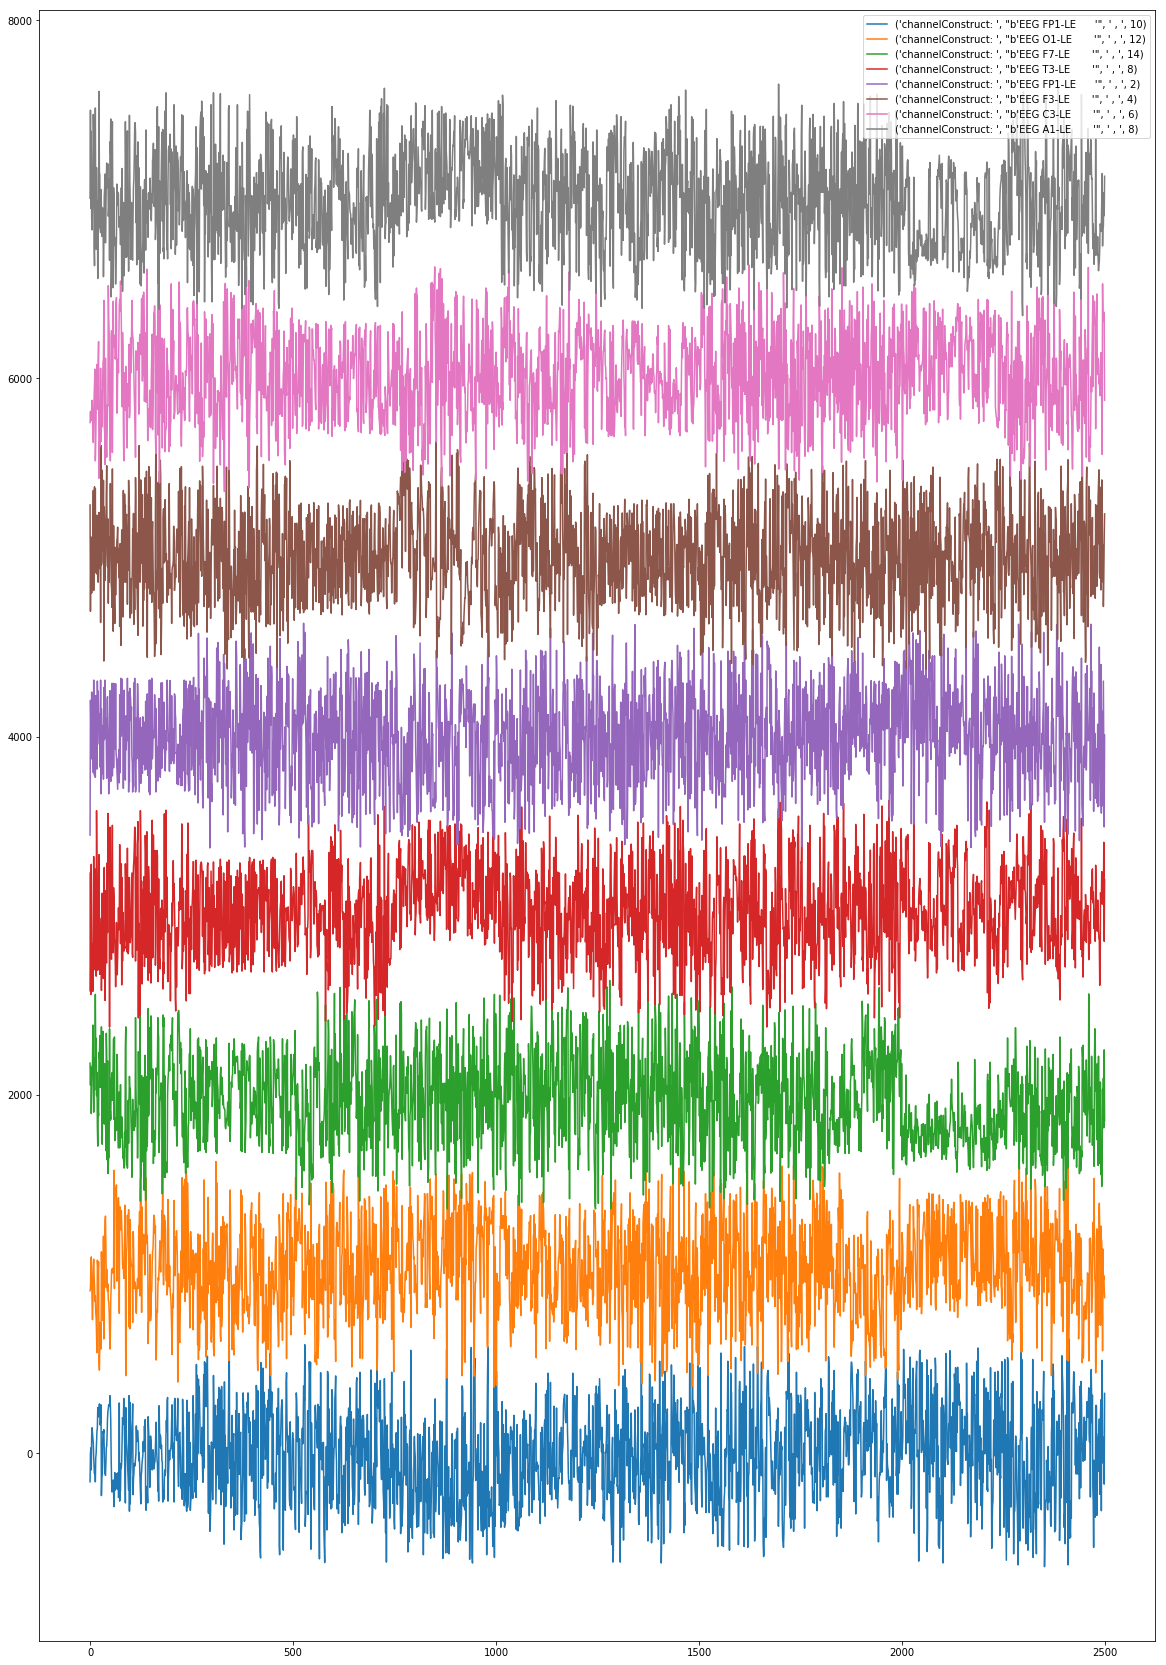

In [168]:
featureFiles = os.listdir('abszDirectory')
#print(featureFiles)
sampleTxtFile = 'abszDirectory/'+str(featureFiles[0])
testDataFile = loadFeatureData(sampleTxtFile)
eegKeys = list(testDataFile.keys())

#print (testDataFile.keys())
#print(testDataFile[eegKeys[0]][0:20])
#for i,key in enumerate(eegKeys):
#    print (i,' : ',key,testDataFile[key][0:10])
    
longBipolarMontage = [[0,10],[10,12],[12,14],[14,8],[0,2],[2,4],[4,6],[6,8]]
plt.figure(figsize=(20,30))


for i,channelConstruct in enumerate(longBipolarMontage):
    #print ('channelConstruct: ',channelConstruct[0],' , ',channelConstruct[1])
    channelData = np.array(testDataFile[eegKeys[channelConstruct[0]]][5000:7500]) - np.array(testDataFile[eegKeys[channelConstruct[1]]][5000:7500])
    #print (eegKeys[channelConstruct[0]],' - ',eegKeys[channelConstruct[1]],' : ',channelData)
    plt.plot((channelData/100+i*1000),label=('channelConstruct: ',eegKeys[channelConstruct[0]],' , ',channelConstruct[1]))
    plt.legend()

In [67]:
'''testTextFileRecords  = testDb.sessions.find({}).limit(5)
with open("testData.txt",'w') as testDataText:
    testDataText.write("EDF Data")
for x in testTextFileRecords:
    #print(x['edfList'],'\n')
    #fileName = "filetest.txt"
    fileName = str(str(x['sessionId'])+'.txt')
    #print(x['sessionId'])
    with open(fileName,'w') as newFile:
        newFile.write("This is a new file")
        #print(x['tseList'])
        #tseFile = x['tseList'][0]
        #print("TSE FROM PARSE FUNCTION: ",x['tseData'],'\n')
    for y in x['edfList']:
        currentEDF = edfData(1)
        currentEDF.loadFile(y)
        currentEDF.parseEdf()
        edfDataText = currentEDF.dataDictionary(0,60)
        #print(edfDataText.keys())
        #edfDataText = currentEDF.allData()
        #print(edfDataText)
        with open(fileName,"a") as testData:
            testData.write("[")
            for key, value in edfDataText.items():
                testData.write(key)
                for i in value:
                    testData.write(str(i))
                    testData.write(",")
                

#print(tseFile)
with open(str(tseFile),'r') as tseFileData:
            tseData = [line.rstrip('\n') for line in tseFileData]
print("TSE DATA FROM FILE: ",tseData)
'''
'''
edfFile1 = edfData(1)
edfFile1.loadFile("v1.2.0/eval/01_tcp_ar/00000258/s002_2003_07_21/00000258_s002_t000.edf")
edfFile1.parseEdf()

with open("test.txt", "a") as myfile:
    myfile.write("appended text")
'''


KeyboardInterrupt: 